# Part I - ( Loan Data from prosper Exploration)
## by Bernice Akinwande

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
#read data set
df_loan = pd.read_csv('prosperLoanData.csv')
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# show maximun number of columns and row displayed

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [4]:
# preview the dataset
print(df_loan.shape)
print(df_loan.dtypes)

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [5]:
# check the statistics of the dataset
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [6]:
# check for duplicated values in the dataset
sum(df_loan.duplicated()) 

0

In [7]:
# check for the number of null values on the columns
df_loan.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [8]:
#drop some columns that are of zero values and will not be useful in this analysis
df_loan.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

In [9]:
#confirm dropped columns
df_loan.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,640.0,659.0,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,680.0,699.0,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,480.0,499.0,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,800.0,819.0,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,680.0,699.0,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [10]:
# take out loans without ProsperScores 
df_new_loan = df_loan[df_loan['ProsperScore'].isnull()==False]

In [11]:
#confirm if it has been taken away
df_new_loan.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,680.0,699.0,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,800.0,819.0,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,680.0,699.0,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,B,10.0,1,NM,Professional,Employed,82.0,True,740.0,759.0,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,62999.0,0.39,86509.0,47.0,1.00,0.0,0.36,"$100,000+",True,8333.333333,3,123257,15000,2013-12-24 00:00:00,Q4 2013,874A3701157341738DE458F,342.37,679.34,351.89,327.45,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,E,2.0,1,KS,Sales - Retail,Employed,172.0,False,680.0,699.0,10.0,7.0,20.0,6,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5812.0,0.72,1929.0,16.0,0.68,0.0,0.27,"$25,000-49,999",True,2083.333333,11,88353,3000,2013-04-18 00:00:00,Q2 2013,AA4535764146102879D5959,122.67,1226.70,604.25,622.45,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1



### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is The Borrower's APR that will be analyzied with many factors like the borrower's rating, score, occupation and income that could influence change in borrower's APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The Prosper Rating and score could show low Borrower's APR because higher rating reflect the borrower's personality to be more trustworthy. Creditscore could also have similar effect on Borrower's APR as Prosper Rating.

## Univariate Exploration


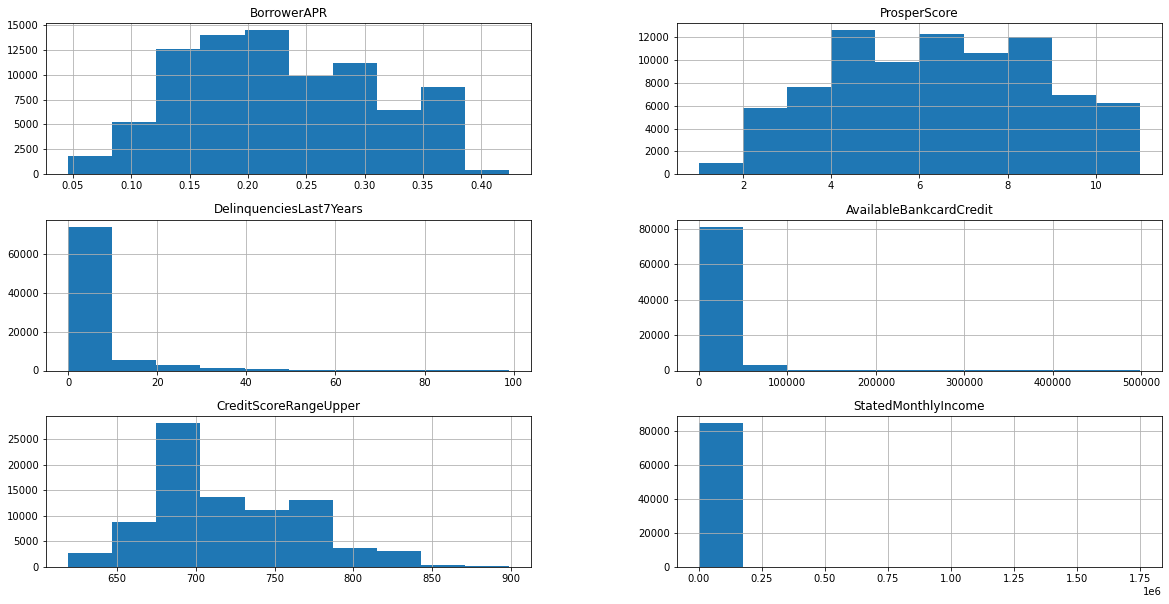

In [12]:
#lets get a general overview of some numerical variable columns we would be exploring 
#in the  data set with an histogram
sample_variables = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 'AvailableBankcardCredit', 'CreditScoreRangeUpper', 'StatedMonthlyIncome']
df_new_loan[sample_variables].hist(xlabelsize= 10,figsize= [20,10]);

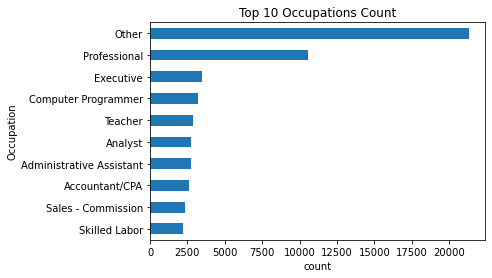

In [13]:
#to find the top 10 occupations of borrowers
#define a function for scatter plot to avoid writing repeatitive codes
def plot_scatter(a,b,c):
    plt.scatterplot(x=a, y=b, data=c)
    plt.figsize=(12,12) 
    plt.fontsize = 12

df_new_loan['Occupation'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top 10 Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation');



#### The Top 10 Occupations Count shows that most borrowers have their occupations as "others" followed by "professional" and this might be because they probably did not want to details on their occupation, so they picked "others". The other occupations have little difference between them compared to the "others" and "proffessional" occupation. The essence of this visualisation is to find out the top occupation of most borrowers.


#### We find for the Top 10 Occupations Count to check their BorrowerAPR values, and the visualization shows that they have almost the same BorrowerAPR values. Hence, occupation might not be the best variable to use in analyzing and finding the BorrowerAPR, because it is unclear, other factors should be considered.

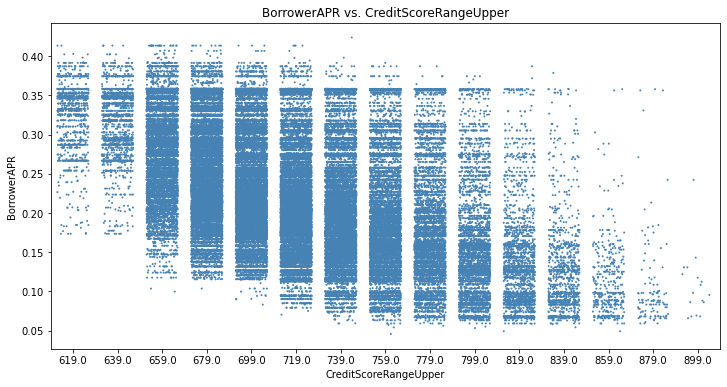

In [14]:
fig = plt.figure(figsize =(12, 6))
sns.stripplot(data= df_new_loan, x= 'CreditScoreRangeUpper', y = 'BorrowerAPR',
             jitter = 0.35, color ='steelblue', size =2)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('BorrowerAPR');

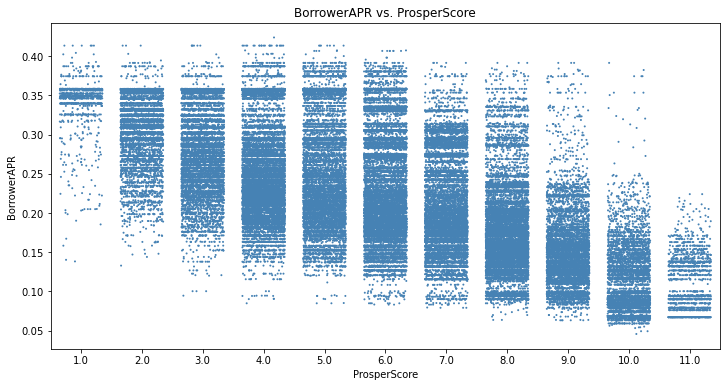

In [15]:
fig = plt.figure(figsize =(12, 6))
sns.stripplot(data= df_new_loan, x= 'ProsperScore', y = 'BorrowerAPR',
             jitter = 0.35, color ='steelblue', size =2)
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

#### The above visualisations shows the correlation between BorrowerAPR vs. CreditScoreRangeUpper and BorrowerAPR vs. ProsperScore respectively. The CreditScoreRangeUpper and ProsperScore are negatively correlated to borrowerAPR, this visualization helps to see the effects on BorrowerAPR again. We can see the increase as BorrowerAPR decrease in the plots. BorrowerAPR decreases as the CreditScoreRangeUpper and ProsperScore increases. 

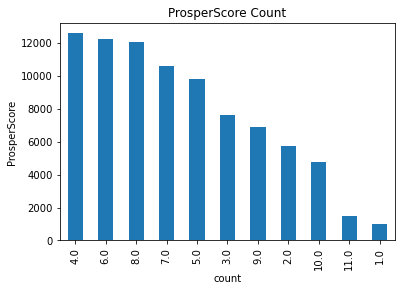

In [16]:
# to check which ProsperScore borrowers received loans the most
    
df_new_loan['ProsperScore'].value_counts().plot(kind='bar')
plt.title('ProsperScore Count')
plt.xlabel('count')
plt.ylabel('ProsperScore');


#### The ProsperScore Count visualization above shows that most borrowers have a low prosper score, which means and the lower the score, the higher the borrower counts it has.


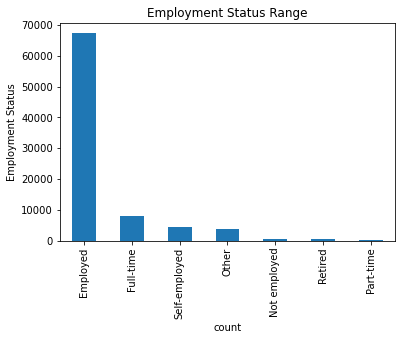

In [17]:
# to check the employment status of loan borrowers


def plot_scatter(a,b,c):
    plt.scatterplot(x=a, y=b, data=c)
    plt.figsize=(12,12) 
    plt.fontsize = 12
df_new_loan['EmploymentStatus'].value_counts().plot(kind='bar')
plt.title('Employment Status Range')
plt.xlabel('count')
plt.ylabel('Employment Status');

#### The employment status of those that borrowed loan is shown in this visualization, it shows that most borrowers are employed, this can be used to decipher the borrowers APR as there is a huge gap between employed and unemployed borrowers.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


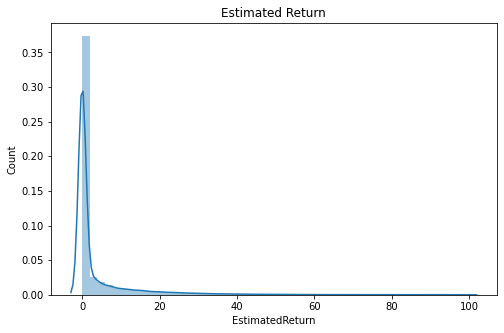

In [18]:
# to check for distribution of Delinquencies in the Last 7 Years
plt.figure(figsize = [8,5])
sns.distplot(df_new_loan.DelinquenciesLast7Years)
plt.title('Estimated Return')
plt.xlabel('EstimatedReturn')
plt.ylabel('Count');

####  The visualization on Estimated Return on this histogram shows that it is right skewed and the distribution shows that most of the loans taken by borrowers  have an estimated return of between 0% and 20%. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


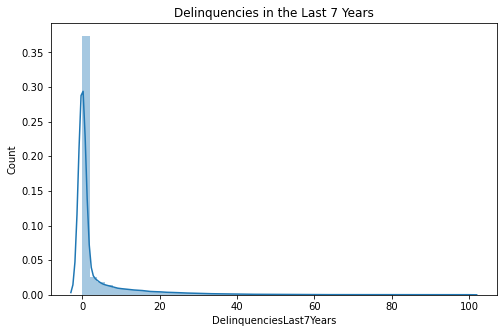

In [19]:
# to check for distribution of Delinquencies in the Last 7 Years
plt.figure(figsize = [8,5])
sns.distplot(df_new_loan.DelinquenciesLast7Years)
plt.title('Delinquencies in the Last 7 Years')
plt.xlabel('DelinquenciesLast7Years')
plt.ylabel('Count');

####  The visualization on Delinquencies in the Last 7 Years on this histogram shows that most of the borrowers between 0% and 20% have Delinquencies in the Last 7 Years.

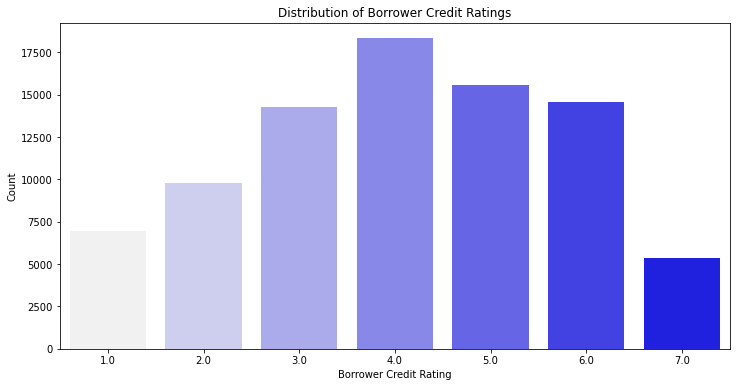

In [20]:
#to show distribution of borrower credit ratings
plt.figure(figsize = [12, 6])
sns.countplot(data = df_new_loan, x = 'ProsperRating (numeric)', palette ="light:b")
plt.xlabel('Borrower Credit Rating')
plt.ylabel('Count')
plt.title('Distribution of Borrower Credit Ratings');

#### The visualization on this histogram shows the distribution of borrower's credit ratings skewed to the right, which might imply that for a particular credit rating there is a range of possible estimated return.

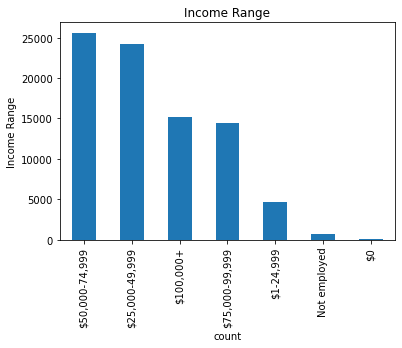

In [21]:
#to check the income range of borrowers

def plot_scatter(a,b,c):
    plt.scatterplot(x=a, y=b, data=c)
    plt.figsize=(12,12) 
    plt.fontsize = 12
df_new_loan['IncomeRange'].value_counts().plot(kind='bar')
plt.title('Income Range')
plt.xlabel('count')
plt.ylabel('Income Range');

#### We find in this visualization the income range of those that borrowed loan. The visualization shows that most borrowers have an income earning of about $74,999-$49, 999

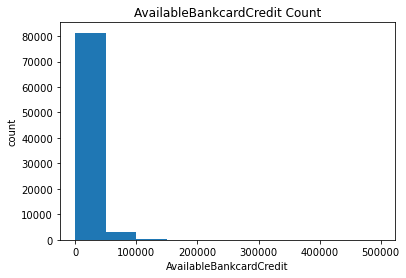

In [22]:
#to find the count of borrowers with Bank card credit
plt.hist(data = df_new_loan, x = 'AvailableBankcardCredit',)
plt.title('AvailableBankcardCredit Count')
plt.xlabel('AvailableBankcardCredit')
plt.ylabel('count');


#### The visualization shows most people that borrowed loan have their available bank card credit value range from 0k-100,000k. It is obvious that a lot of people in this category are more than people that have a high available bank card credit that opted for a loan

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The borrower's occupation and the prosperscores were visualized in this univariate exploration. There was no unusual points in this visualization, hence, there was no need to perform any transformation

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the prosperscore, there was a little bit unusual distribution. The trend that was noticed on the visualization was, the higher the borrower's count, the lower the prosperscore. But for 6.0 and 8.0 count there was a raise in bar, although not higher than 4.0 and the others that followed the trend. This could be due to other factors around the data.

## Bivariate Exploration


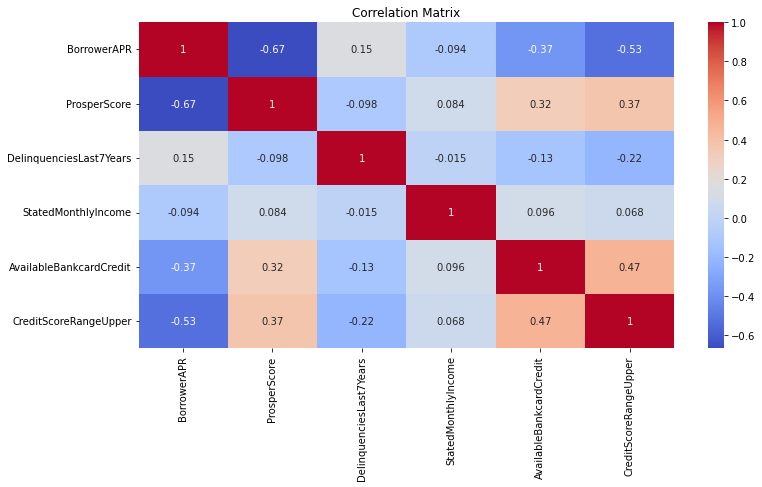

In [23]:
 #to find correlation between attributes 
numerical_variables = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

fig = plt.figure(figsize =(12, 6))
sns.heatmap(df_new_loan[numerical_variables].corr(), annot= True, cmap ='coolwarm')
plt.title('Correlation Matrix') 
plt.show()

#### The Correlation Plot shows generally that there are not exactly any strong positive relationships between any of the paired variables. But the BorrowerAPR and ProsperScore are negatively correlated because borrowers with lower score are more likely to pay higher APR. Also, higher CreditScore means the borrowers can be trusted more, and so it got a lower APR. The correlation also shows that AvailableBankcardCredit has better creditscore. 

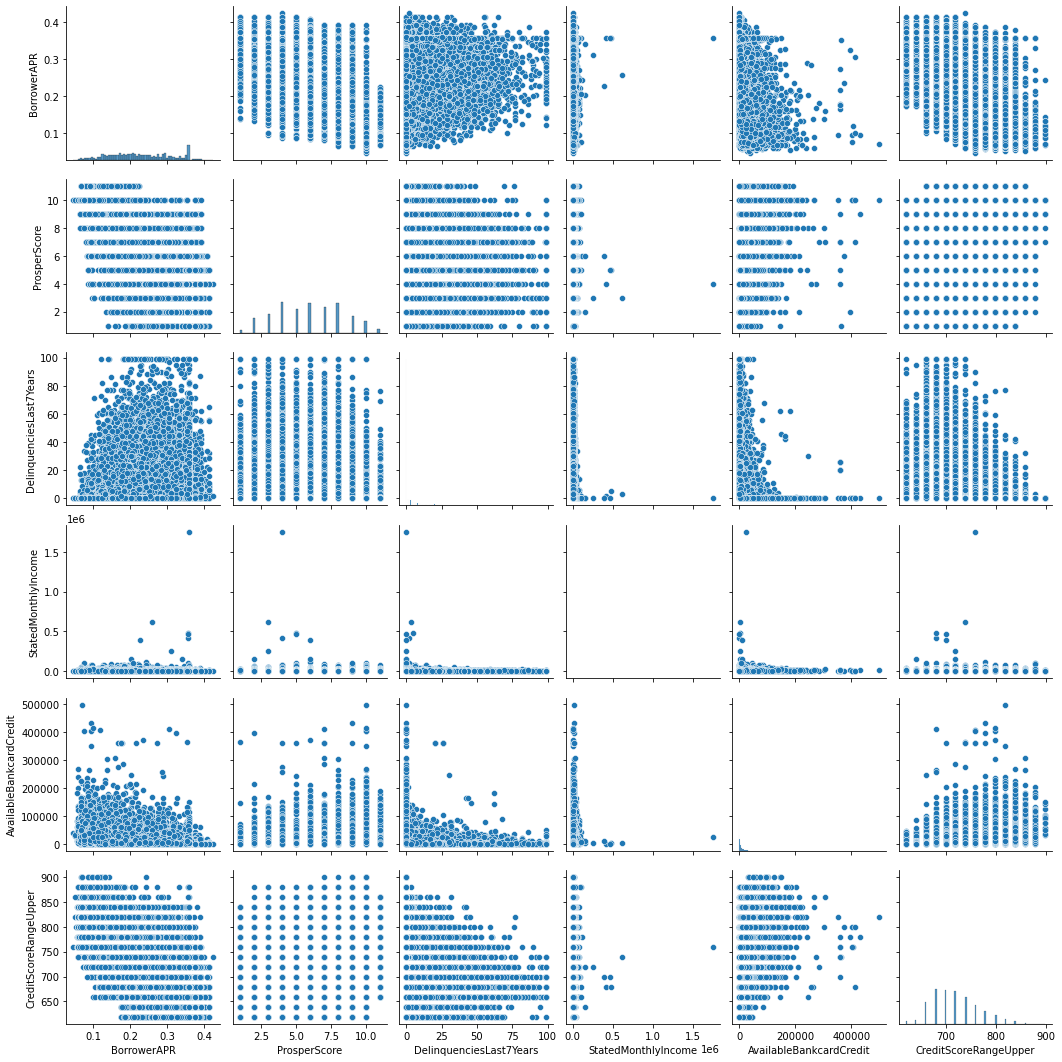

In [24]:
numerical_variables = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']
sns.pairplot(data= df_new_loan, vars = numerical_variables);

#### The Matrix Plot shows the relationship between the variables, just as the correlation plot, we can determine which pair has negative or positive relationships from analyzing the pattern in each scatter plots. ProsperScore seems to be more related to BorrowerAPR compare to other variables. 

In [29]:
#to find a relationship between borrower APR and income range

def Func_plot(datas, var1,var2, order = None):
    
    plt.figure(figsize=[24, 6])
    plt.subplot(1,2,1)
    sns.violinplot(data = df_new_loan , x = var1, y =var2, order=order)
    
   
    plt.subplot(1,2,2)
    sns.boxplot(data = df_new_loan , x = var1, y=var2, order=order)
  

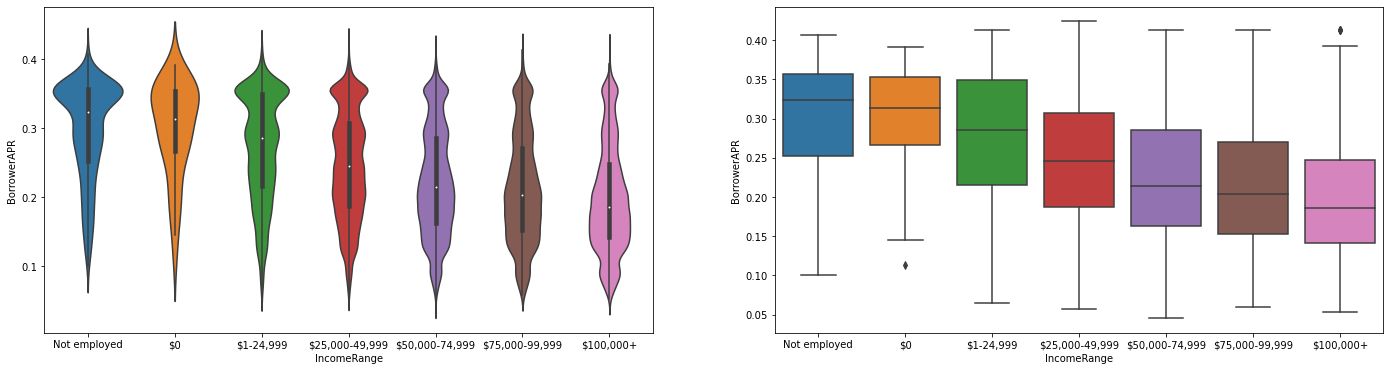

In [30]:
#list of income in order
income_order=['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
#call plot function
Func_plot(df_new_loan, 'IncomeRange', 'BorrowerAPR', order= income_order)

#### People that are employed tends to have a better proper score rating than every every other category of employement status.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The correlation and matrix plots are really helpful to check for all the possibles variables that are related to BorrowerAPR. The visualization shows that out of all variables, ProsperScore has stronger relationship with BorrowerAPR (negative correlated). Using the Bivariate Exploration compared to Univariate Exploration,it helps to examine and gain insights more about the BorrowerAPR.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most of the variables are positively correlated compared to the prosperscore that is negatively correlated

## Multivariate Exploration


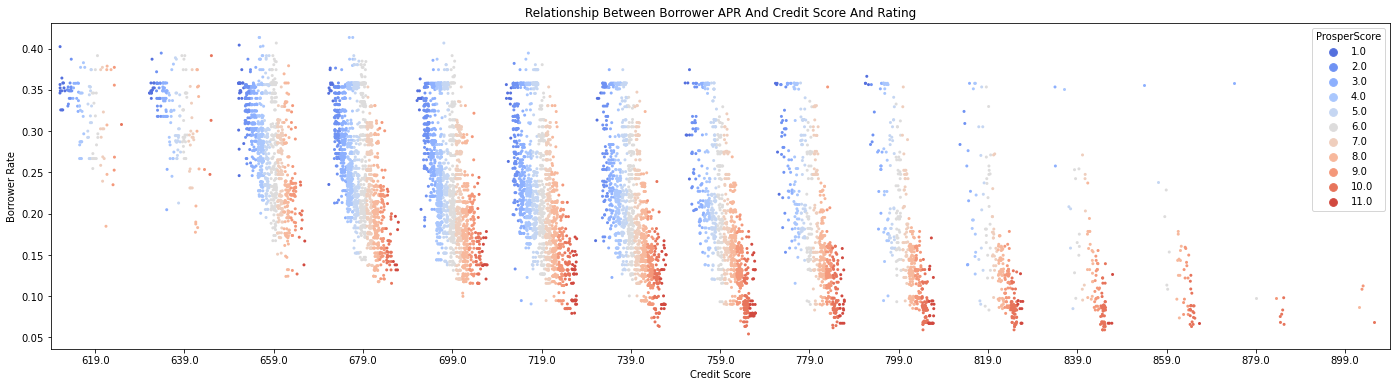

In [27]:

# this plot is memory intensive, create a smaller sample of data to use it
df_sample=df_new_loan.sample(10000, random_state=42)

#set plot dimensions
plt.figure(figsize =(24, 6))
sns.stripplot(data=df_sample, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', hue ='ProsperScore',
             jitter=0.35, dodge=True, size=3, palette='coolwarm')

plt.title('Relationship Between Borrower APR And Credit Score And Rating')
plt.xlabel('Credit Score',)
plt.ylabel('Borrower Rate');


#### BorrowerAPR vs. CreditScoreRangeUpper & ProsperScore is to show the relationship, since CreditScoreRangeUpper and ProsperScore are positive correlated to borrowerAPR, this visualization helps to see the another on BorrowerAPR from a different lens. It is visible that CreditScoreRangeUpper increase as BorrowerAPR decrease in the visualization. The second plot in which the color encodings was added to ProsperScore, BorrowerAPR decreases as ProsperScore increases. This means that CreditScoreRangeUpper and ProsperScore negatively correlated to BorrowerAPR.

## Conclusions
>Generally, all visualizations made from univariate exploration to bivariate exploration to multivariate exploration, most of the variables are found to be negatively correlated to BorrowerAPR, whereas ProsperScore gives the strongest negative relationship.